## Stock market analysis and Risk analysis

In [3]:
#importing the libraries
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting white grid as backgroud for visualization
sns.set_style('whitegrid')

#commanding the juypter notebooks to display the graphs.
%matplotlib inline


DataReader allows us to read the stock information from internet. Either from google finance or Yahoo finance

In [12]:
#installing the packages
!pip install pandas-datareader

    100% |████████████████████████████████| 112kB 3.2MB/s ta 0:00:01


In [24]:
from pandas_datareader import data, wb

In [27]:
import pandas_datareader as pdr

In [15]:
#to measure the start_time and end_time
from datetime import datetime

In [16]:
from __future__ import division

###### We will do a stock analysis on the four major tech companies - Amazon, Google, Microsoft and Apple.

In [17]:
# creating a list for four tech companies's stock prices
stock_list=['AAPL','GOOG','MSFT','AMZN']



In [21]:
#setting the start time and end time
end_time=datetime.now()

start_time=datetime(end_time.year-1,end_time.month,end_time.day)

In [30]:
# using a for loop to extract the stock prices from yahoo:
for stocks in stock_list:
    globals()[stocks]= pdr.get_data_yahoo(stocks,start_time,end_time)

datareader is the function used to extract stock prices from yahoo( we can also use google). we are gloablising the variables so we can call anywhere in the notebook. The arguments start_time and end_time are time duration of the stocks

In [32]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-21,155.800003,152.750000,155.800003,153.389999,37511700.0,151.105270
2017-09-22,152.270004,150.559998,151.539993,151.889999,46645400.0,149.627625
2017-09-25,151.830002,149.160004,149.990005,150.550003,44387300.0,148.307571
2017-09-26,153.919998,151.690002,151.779999,153.139999,36660000.0,150.859009
2017-09-27,154.720001,153.539993,153.800003,154.229996,25504200.0,151.932770


In [33]:
# Descriptive stats abt google
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1103.314380,1083.648858,1093.147901,1093.893869,1.568479e+06,1093.893869
std,80.091351,79.602300,80.216299,79.864984,6.804895e+05,79.864984
min,926.400024,909.700012,923.719971,920.969971,5.370000e+05,920.969971
25%,1042.050049,1020.130981,1028.989990,1031.260010,1.169800e+06,1031.260010
50%,1094.165039,1073.500000,1083.560059,1084.989990,1.363000e+06,1084.989990
75%,1171.626953,1149.589966,1158.500000,1157.660034,1.828800e+06,1157.660034
max,1273.890015,1249.020020,1271.000000,1268.329956,5.167700e+06,1268.329956


PLotting a time series graph for Apple.

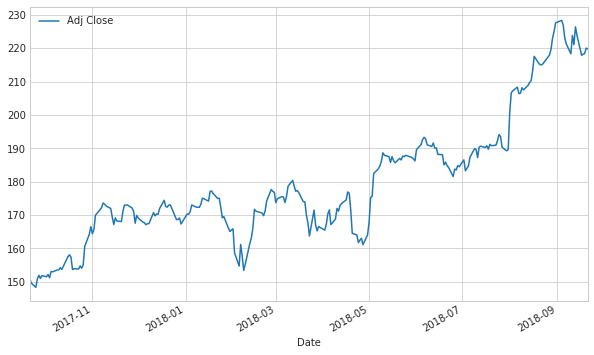

In [39]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,6))

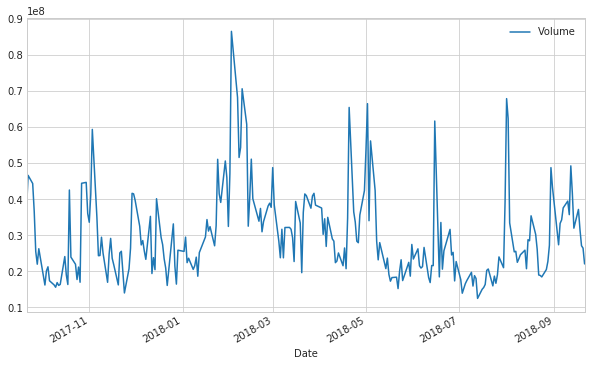

In [41]:
AAPL['Volume'].plot(legend=True,figsize=(10,6))

The above visualizations helps us to understand the trading of the stocks on a time-series graph.

###### Moving averages are used as indicators in filtering out the noise from random fluctuations and helps smooth out price actions. Moving average acts as a support or resistance, by cutting out th noise in the price action. If the price is above the moving average, the trend is up. But if the price is below the moving average, the trend is down

In [47]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.Series.rolling(AAPL['Adj Close'],window=ma).mean()

In [49]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2018-09-17,222.949997,217.270004,222.149994,217.880005,37195100.0,217.880005,223.101003,221.074502,207.472197
2018-09-18,221.850006,217.119995,217.789993,218.240005,31571700.0,218.240005,222.089003,221.213502,208.038718
2018-09-19,219.619995,215.300003,218.500000,218.369995,27123800.0,218.369995,221.239003,221.380002,208.612423
2018-09-20,222.279999,219.149994,220.240005,220.029999,26460800.0,220.029999,220.932002,221.629002,209.268555
2018-09-21,221.360001,218.380005,220.779999,219.804993,22080471.0,219.804993,220.782501,221.844751,209.857407


We have calculated the moving averages for 10 days, 20 days, 50 days and have added to the dataframe.
And now plot the grapg for Adf close with the moving averages

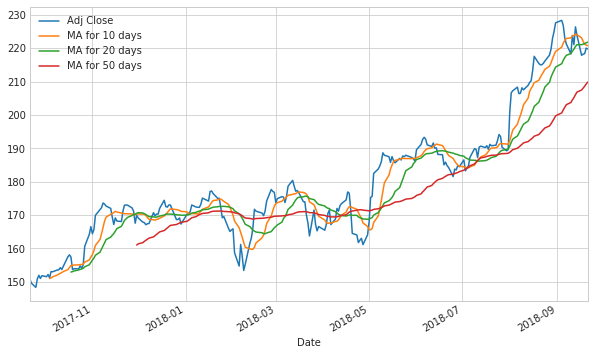

In [50]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,6))


##### Daily return analyis
In order to analyse the daily returns, we will create a new column called " Daily return" and calculate the percentage change of Adj Close.  By calculating the daily returns of the stock, we can calculate the risk of the stocks
Later, we will plot the chart.

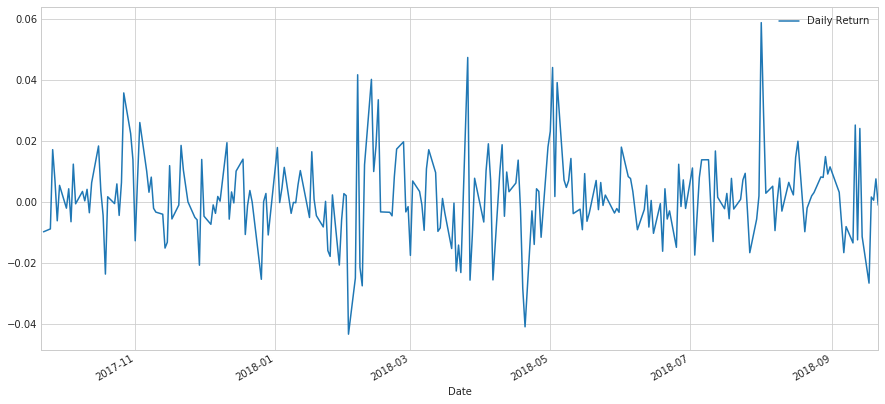

In [53]:
#calculating the percentage of stocks
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(15,7),legend=True,)

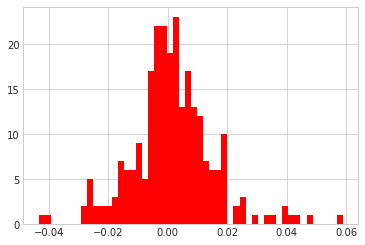

In [60]:
#creating an histogrm for the daily returns:
AAPL['Daily Return'].hist(bins=50,color='red')

###### Creating a dataframe with Adj Close values of all four tech companies

In [125]:
closing_df = pdr.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start_time,end_time)['Adj Close']


In [127]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-09-21,151.105270,964.650024,932.450012,72.896225
2017-09-22,149.627625,955.099976,928.530029,73.092697
2017-09-25,148.307571,939.789978,920.969971,71.963051
2017-09-26,150.859009,938.599976,924.859985,71.963051
2017-09-27,151.932770,950.869995,944.489990,72.542610


Creating the daily returns of the stock.


In [128]:
#daily returns..
tech_rets = closing_df.pct_change()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


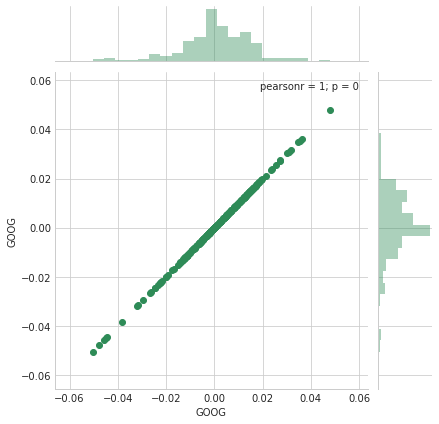

In [131]:
#we will compare google' stocks with google itself and plot a scatter plot to test the linear relationship.
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


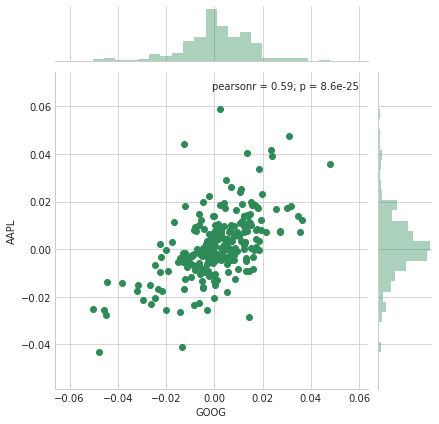

In [132]:
sns.jointplot('GOOG','AAPL',tech_rets,kind='scatter',color='seagreen')


The pearson's value is 0.59.(i.e), The correleation between daily stock return of google and apple is 0.59.
There is a strong correletion between the stocks of google and apple

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


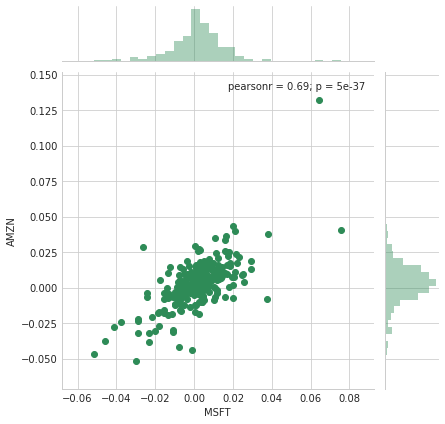

In [133]:
sns.jointplot('MSFT','AMZN',tech_rets,kind='scatter',color='seagreen')


The pearson's value is 0.69, hence there's a strong correleation between the daily stock returns of microsoft and amazon.

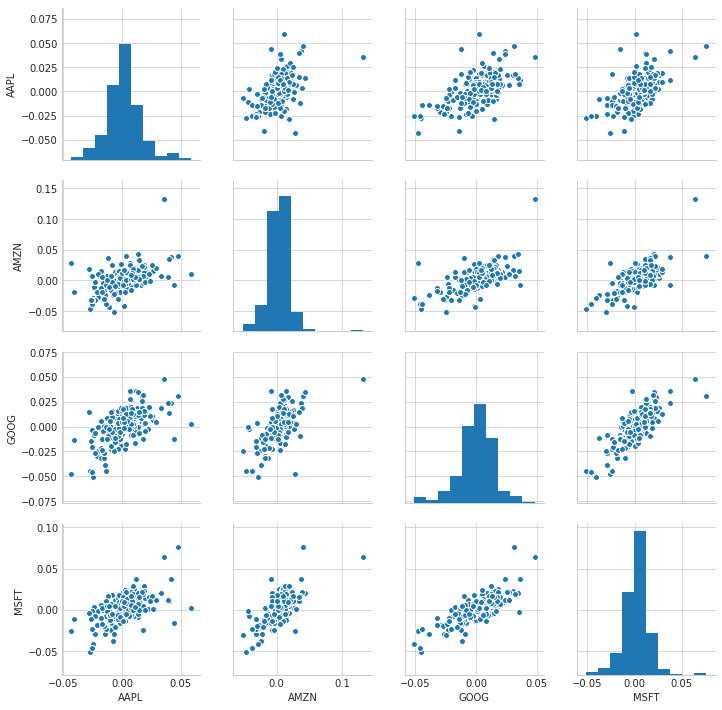

In [134]:
# we can create a pairplot to study the correleation between all the variables
sns.pairplot(tech_rets.dropna())


We can also create our own pairplot with customized charts on it. We can choose what plots, or color to be displayed. This is done using sns.PairGrid()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


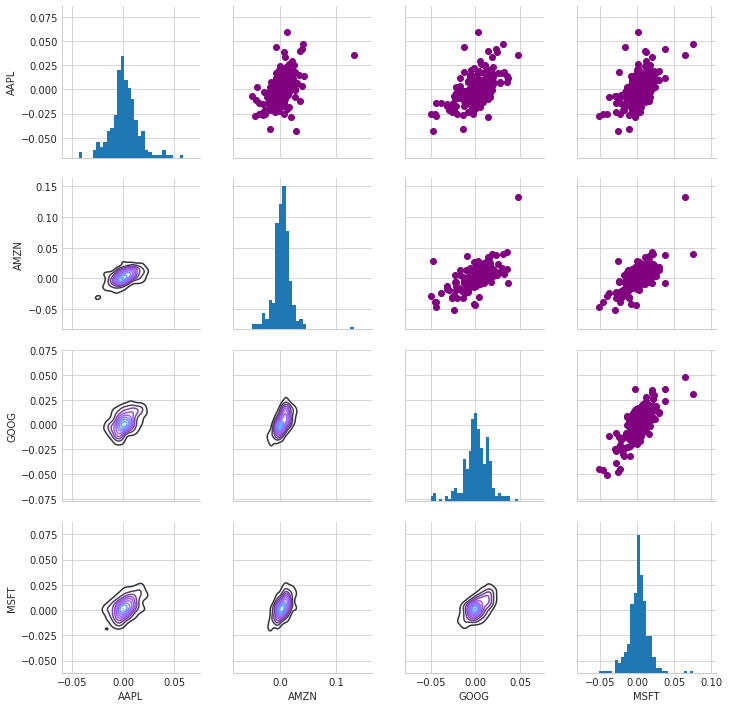

In [135]:
#creating a pairplot on the  dataframe
returns_fig_plt = sns.PairGrid(tech_rets.dropna())

#choosing scatter plot for the upper triangle
returns_fig_plt.map_upper(plt.scatter,color='purple')

#choosing kde plot for the lower triangle
returns_fig_plt.map_lower(sns.kdeplot,cmap='cool_d')

#choosing histogram for diagonal.
returns_fig_plt.map_diag(plt.hist,bins=30)

We can also  create pairplots for closing stock prices.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


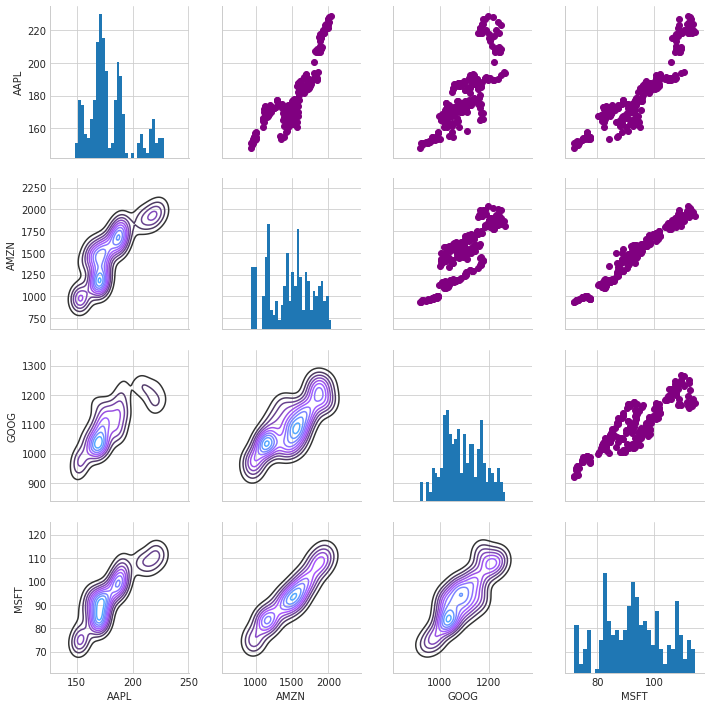

In [136]:
#creating a pairplot on the  dataframe
returns_fig_plt = sns.PairGrid(closing_df.dropna())

#choosing scatter plot for the upper triangle
returns_fig_plt.map_upper(plt.scatter,color='purple')

#choosing kde plot for the lower triangle
returns_fig_plt.map_lower(sns.kdeplot,cmap='cool_d')

#choosing histogram for diagonal.
returns_fig_plt.map_diag(plt.hist,bins=30)

One of the disadvantage of the graphs is that the values are not mentioned. The correleation can be viusalised but not listed in numeric format. For to see their corrleation in numeric values, we can use corrplot()

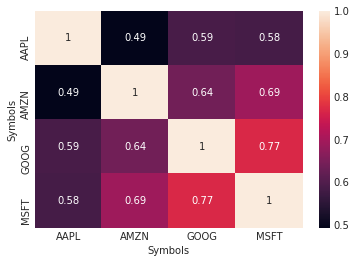

In [149]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

From the correleation plot, we can say that the highest correleation is between google and microsoft. And the lowest correleation is between apple and amazon

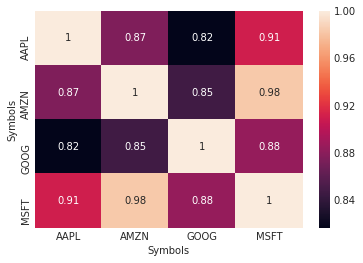

In [150]:
# correlation for the closing prices.
sns.heatmap(closing_df.dropna().corr(),annot=True)

### Risk analysis

In [151]:
#creating a new dataframe - cleaned version of tech_rets
stock_rets=tech_rets.dropna()

In [152]:
#adjusting the size of the scatter plot ( the scatter dot size)
area=np.pi*20

(-0.003, 0.004)

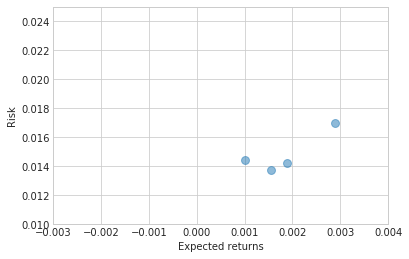

In [155]:
#the mean is on X-axis and standard deviation on Y-axis
plt.scatter(stock_rets.mean(), stock_rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

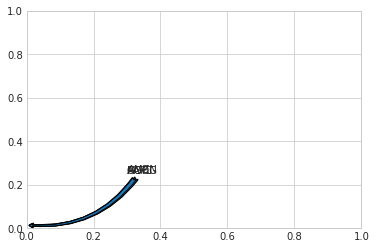

In [164]:
#labelling the scatter plots
for label, x, y in zip(stock_rets.columns, stock_rets.mean(), stock_rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (100, 50),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.30'))

As the risk of these stocks are very similar to one another, it is hard find deviations between them


#### Value at risk
Value at risk is the amount of money we could expect to lose for given confidence interval

##### BOOTSTRAP METHOD
We will calculate the quantiles from the histogram of daily returns

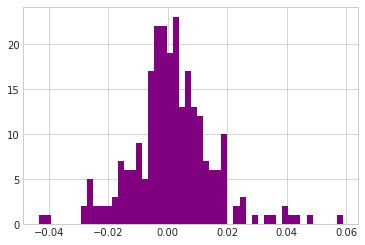

In [166]:
AAPL['Daily Return'].hist(bins=50,color='purple')

In [168]:
#Now we can use quantile to get the risk value for the stock.

# The 0.05 empirical quantile of daily returns
stock_rets['AAPL'].quantile(0.05)

-0.02104188013596707

0.05 emprical quantile of daily returns is -0.021. It means that with 95%  confidence, the maximum loss could be with the variation of 2.1%. For instance, if I invest in Apple stocks for $1000, the max money I could loose is 21 dollars

In [169]:
stock_rets['AMZN'].quantile(0.05)

-0.02562704533144762

In [172]:
for risk in stock_list:
    print("the risk of ",risk," is ->",stock_rets[risk].quantile(0.05)*100)

the risk of  AAPL  is -> -2.104188013596707
the risk of  GOOG  is -> -2.397846920098915
the risk of  MSFT  is -> -2.227183442100718
the risk of  AMZN  is -> -2.562704533144762


### From the above analysis, we can conclude that on buying shares the compnay with the maximun risk is Amazon and the company with the minimum risk is Apple.